In [2]:
# converting notebook to presentation # in progress
import nbconvert
jupyter nbconvert --to slides final_presentation.ipynb

SyntaxError: invalid syntax (3298623289.py, line 3)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython import display

# Uber Eats - Do you want fries with that?

Team members:
- Agnieszka Kołomyjec
- Barbara Wierzba-Sowińska
- Krzysztof Łukjanowicz
- Marcin Sarnowski
- Natalia Skrzypczak


#### Data Description:

The data used for this project is a dataset on Uber Eats USA restaurants and menus, which was obtained from Kaggle. The dataset includes information on over 20,000 restaurants and menus, including their location, cuisine type, rating, and price range. Additionally, the dataset includes information on the individual dishes available at each restaurant, including their name, price, and description.

### Project Description

The goal of this project is to provide insights for an investor who wants to open a vegetarian restaurant in the USA. To achieve this, we analyzed the Uber Eats USA Restaurants Menus dataset from Kaggle, which contains information on various restaurants and their menus. The analysis focused on identifying the most popular vegetarian cuisines and dishes, as well as the top locations for vegetarian restaurants in the USA. The insights from this analysis can help the investor make informed decisions regarding the location and profile of their new vegetarian restaurant.

### Contents

- Importing necessary libraries
- Reading in restaurant data and defining variables for different price ranges
- Creating data frames for each price range and counting how many restaurants with each price range are in each state
- Merging the data frames and filling in any missing data with 0
- Calculating the percentage of restaurants in each price range per state
- Presenting the resulting data frame with the percentage of restaurants in each price range per state.

In [ ]:
display.Image("./DatA_Team_logo.jpg", width=400)

FileNotFoundError: No such file or directory: './DatA_Team_logo.jpg'

FileNotFoundError: No such file or directory: './DatA_Team_logo.jpg'

<IPython.core.display.Image object>

In [ ]:
restaurants = pd.read_csv('plik.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'plik.csv'

Definition of variables for different price ranges (expensive and superexpensive have been unified due to the small amount of records).  
Creating dataframes for individual price ranges.


In [ ]:
cheap = restaurants[restaurants['price_range']=='$']
moderate = restaurants[restaurants['price_range']=='$$']
expensive = restaurants[(restaurants['price_range']=='$$$') + (restaurants['price_range']=='$$$$')]

cheapsy = cheap.groupby('state', as_index=False)['price_range'].count()
#name changed to a unique
cheapsy.rename(columns = {'price_range': 'cheap #'}, inplace=True)

moderasy = moderate.groupby('state', as_index=False)['price_range'].count()
moderasy.rename(columns = {'price_range': 'moderate #'}, inplace=True)

expensy = expensive.groupby('state', as_index=False)['price_range'].count()
expensy.rename(columns = {'price_range': 'expensive #'}, inplace=True)

Dataframes are combined into one. Calculation of how many restaurants with specified price ranges are there in different states.


In [ ]:
#dataframes merged gradually
chm = cheapsy.merge(moderasy, how='outer', on ='state')
all = chm.merge(expensy, how='outer', on ='state')

#removal of NaNs
all = all.fillna(0)
#new column: total
all['total'] = all['cheap #'] + all['moderate #'] + all['expensive #']

How does it look like percentage-wise?

In [ ]:
all['cheap #'] = all['cheap #'] / all['total'] * 100
all.rename(columns = {'cheap #': 'cheap %'}, inplace=True)
all['moderate #'] = all['moderate #'] / all['total'] * 100
all.rename(columns = {'moderate #': 'moderate %'}, inplace=True)
all['expensive #'] = all['expensive #'] / all['total'] * 100
all.rename(columns = {'expensive #': 'expensive %'}, inplace=True)
#zaokrąglenie do dwóch miejsc po przecinku
all = all.round(2)
all

States with fewer than 50 restaurants are removed from the dataframe.

In [ ]:
all1 = all.drop(2)
all1 = all1.drop(5)
all1 = all1.drop(6)
all1 = all1.drop(9)
all1 = all1.reset_index(drop=True)
all1

What may be the conclusion of this analysis?  
Opening an expensive restaurant or a restaurant with moderate prices in a state with a significant predominance of cheap restaurants wouldn't be the best idea. For example in Virginia over 80% of restaurants are cheap.  
A better idea would be to focus on states with a higher percentage of moderate restaurants, e.g. West Virginia (45.22%), Wisconsin (42.20%) or District of Columbia (27.08%).

In [ ]:
restaurants2 = restaurants.replace(to_replace="$$$$", value="$$$")
df = restaurants2.value_counts('price_range').rename_axis('price_range').to_frame('total')

df['sum'] = df['total'].sum()
df['sum'] = df['total'] / df['sum'] * 100
df = df.rename(columns={'sum': '%'})
df = df.round(2)
df

In general, what is the distribution of specific price ranges (without division on states)?

In [ ]:
#preparation of data before creating a plot
alltoplot = all1.drop("total", axis='columns')
alltoplot = alltoplot.sort_values('cheap %', ascending=False)
alltoplot.plot(x="state", kind = 'bar', stacked=True, mark_right=True);

For an investor wanting to open a sustainable restaurant with healthy dishes in the USA, it would be really worth it to consider states, where there are many restaurants with "vege" options. It is widely known that plant food is both good for the environment and for our bodies. That's why such a restaurant MUST include vegetarian and vegan options.    

In [ ]:
veg = restaurants[restaurants['category'].notna()]
vege = veg[veg['category'].str.contains('Veg')]

The sum of restaurants with dishes from "vege" category in individual states.

In [ ]:
vegsum = pd.pivot_table(vege, index='state', values='id', aggfunc=len)
vegsum = vegsum.rename(columns={'id': 'Total restaurants with veg'})
vegsum.reset_index(inplace=True)
vegsum

How many restaurants are there in different states anyway?

In [ ]:
totalres = pd.pivot_table(restaurants, index='state', values='id', aggfunc=len)
totalres = totalres.rename(columns={'id': 'Total restaurants'})
totalres

In [ ]:
#merging of two dataframes
sumresveg = totalres.merge(vegsum, how='outer', on = 'state')
sumresveg = sumresveg.fillna(0)

How many restaurants are there with "vege" options in specific states percentage-wise?

In [ ]:
sumresveg['veg restaurants %'] = sumresveg['Total restaurants with veg'] / sumresveg['Total restaurants'] * 100
sumresveg = sumresveg.round(2)
#sumresveg.reset_index(inplace=True)
sumresveg

NameError: name 'sumresveg' is not defined

In [ ]:
vegsumtoplot = vegsum.sort_values('Total restaurants with veg', ascending=False)
vegsumtoplot.plot(kind='bar', x='state', y='Total restaurants with veg')
plt.show()

NameError: name 'vegsum' is not defined

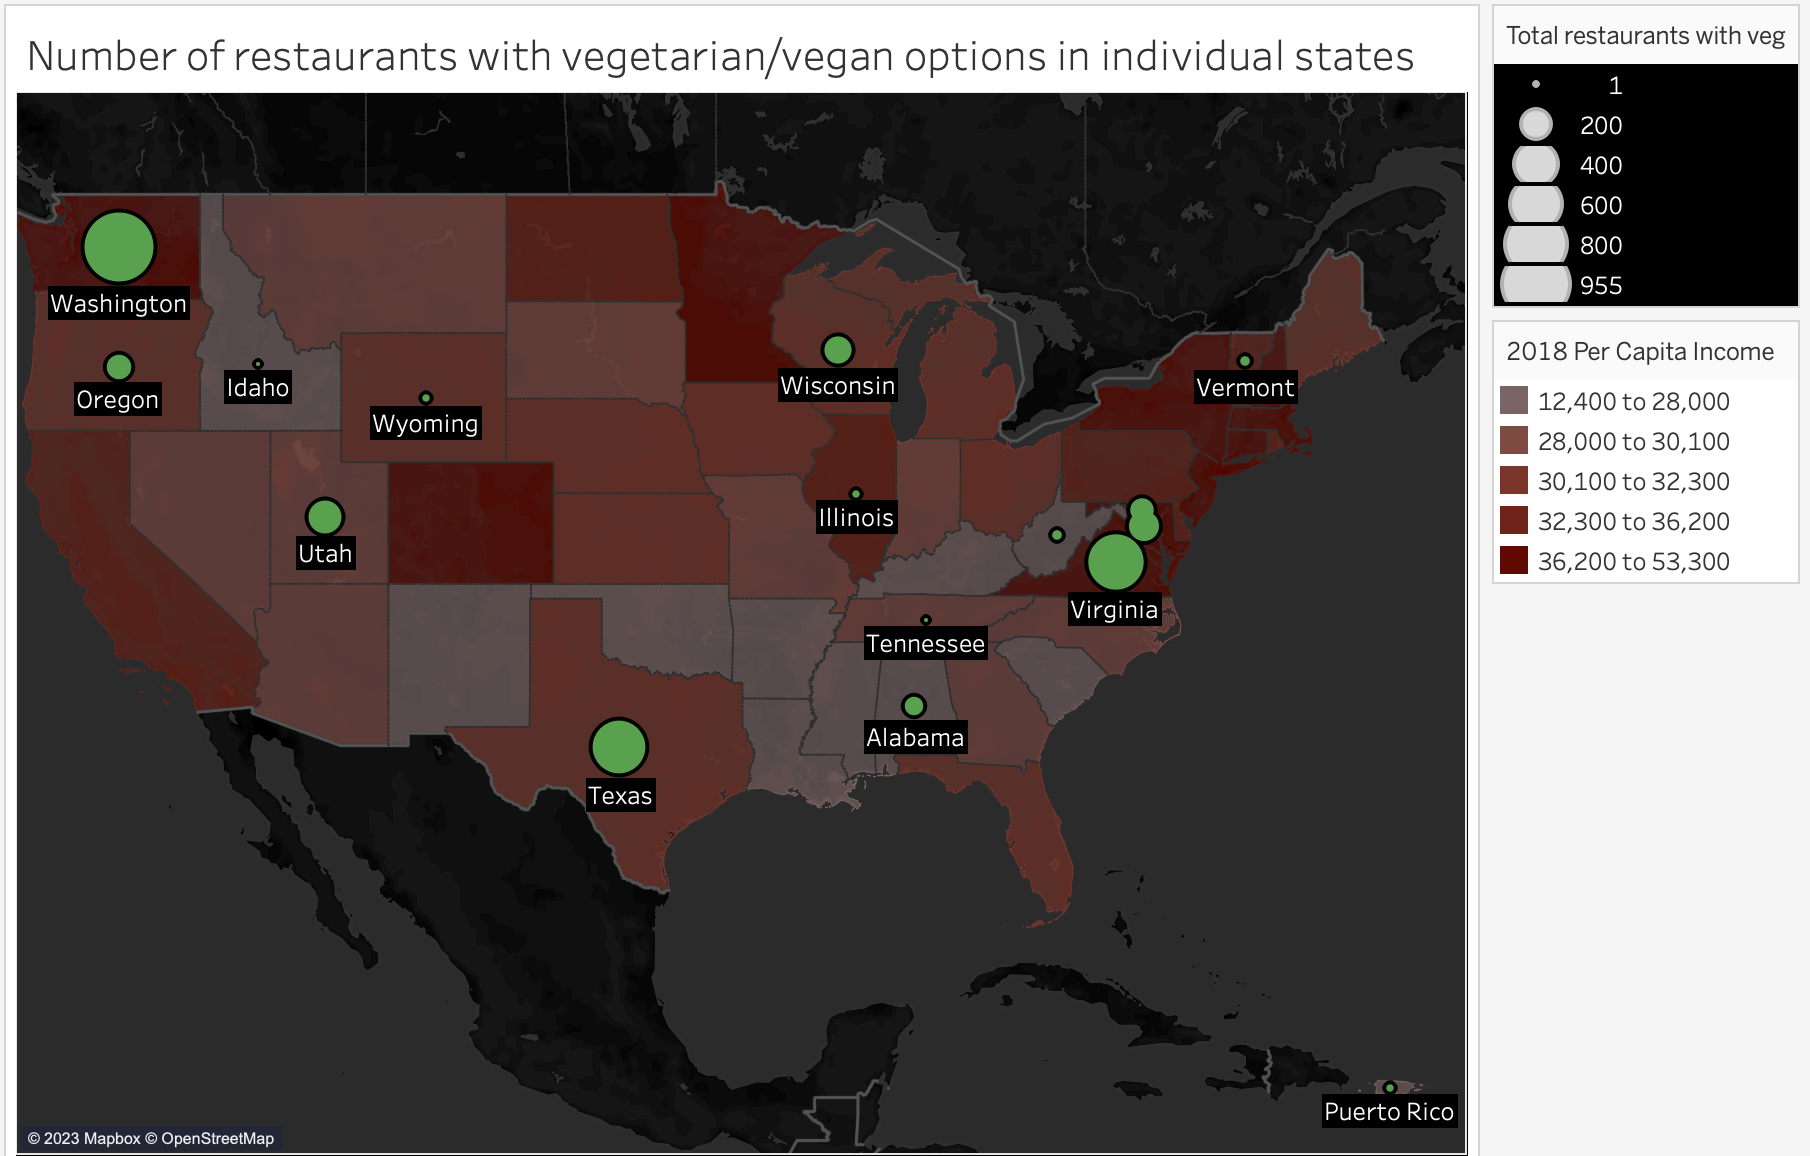

Are restaurants with "vege" options cheap or expensive? How does it look like percentage-wise?

In [ ]:
vege = vege.replace(to_replace="$$$$", value="$$$")
vegpr = vege.value_counts('price_range').rename_axis('price_range').to_frame('total')
vegpr = vegpr.reset_index()
vegpr['sum'] = vegpr['total'].sum()
vegpr['%'] = vegpr['total'] / vegpr['sum']*100
vegpr = vegpr.round(2)
vegpr = vegpr.drop('sum', axis=1)
vegpr

NameError: name 'vege' is not defined

In [ ]:
alltoplot = vegpr.drop("total", axis='columns')
alltoplot.replace(to_replace='$', value='Cheap', inplace=True)
alltoplot.replace(to_replace='$$', value='Moderate', inplace=True)
alltoplot.replace(to_replace='$$$', value='Expensive', inplace=True)
alltoplot
alltoplot.plot(x="price_range", kind = 'bar', stacked=True, mark_right=True);

NameError: name 'vegpr' is not defined

States with a considerable number of restaurants with plant-based options (over 10% of restaurants, states with at least 1000 records) are: District of Columbia (Washington DC, 12.06%), Oregon (11.74%), Washington (10.65%).    

When in comes to prices, so there is a significant predominance of cheap restaurants. This is mostly caused by the fact that our data comprise of data from Uber eats, and people are in general not so eager to order takeaway from expensive restaurants.    

It is worth noticing that when we compare prices in restaurants with vege options to the overall, the proportion of moderate restaurants to cheap restaurants is a little higher.

In [ ]:
score=restaurants.groupby('score')['id'].count()# informacja o tym ile reatauracji ma ocene od 1.3 do 5.0
score


NameError: name 'restaurants' is not defined

In [ ]:
restaurants.groupby('price_range')["id"].count()


NameError: name 'restaurants' is not defined

In [ ]:

ratings=restaurants.groupby('ratings')['id'].count() #informacja o tym ile ocen ma ile restauracji
ratings

NameError: name 'restaurants' is not defined

In [ ]:
ratings_score =restaurants.groupby(['ratings', 'score'])['id'].count() #nie wiem czemu po połączeniu nie pokazuje wszytskeigo
ratings_score


NameError: name 'restaurants' is not defined

In [ ]:
restaurants.groupby('score')['id'].count().sort_values(ascending=False)\
.plot(kind='bar', figsize=(10,6), ylabel="Score of restaurants", xlabel="score");
restaurants_copy = restaurants[['name', 'category', 'state', 'score', 'ratings']].copy() #kopia tabeli restauracje po to zeby pokazać jakie scory są w podziale na kategorie

NameError: name 'restaurants' is not defined